In [67]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

time: 1.03 ms (started: 2022-12-07 09:38:54 +00:00)


In [68]:
!pip install ipython-autotime

%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.56 s (started: 2022-12-07 09:38:55 +00:00)


In [69]:
# load dataset
df = pd.read_excel("Force Dataset.xlsx")
df.tail()

,Displacement,L,B,T,a,b,c,FORCE,time,z,v
8529,11110.0,112.192121,27.940567,5.115273,25494.245033,23120.240497,31641.777057,6063.078356,491,0.120338,0.148511
8530,11110.0,112.192121,27.940567,5.115273,25494.245033,23120.240497,31641.777057,6063.078356,493,0.120753,0.149022
8531,11110.0,112.192121,27.940567,5.115273,25494.245033,23120.240497,31641.777057,6063.078356,495,0.121092,0.149441
8532,11110.0,112.192121,27.940567,5.115273,25494.245033,23120.240497,31641.777057,6063.078356,497,0.121355,0.149766
8533,11110.0,112.192121,27.940567,5.115273,25494.245033,23120.240497,31641.777057,6063.078356,499,0.121543,0.149998


time: 1.35 s (started: 2022-12-07 09:38:59 +00:00)


In [70]:
df.isnull().sum() #no missing data

Displacement    0
L               0
B               0
T               0
a               0
b               0
c               0
FORCE           0
time            0
z               0
v               0
dtype: int64

time: 12.1 ms (started: 2022-12-07 09:39:00 +00:00)


In [71]:
#training the model
X = df[['L','B','T','time']].values
y = df[['z']].values

time: 4.31 ms (started: 2022-12-07 09:39:00 +00:00)


In [72]:
np.random.seed(42)

time: 597 µs (started: 2022-12-07 09:39:00 +00:00)


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_Test = train_test_split(X,y,test_size=0.2,random_state=42)

time: 3.45 ms (started: 2022-12-07 09:39:00 +00:00)


In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

time: 683 µs (started: 2022-12-07 09:39:00 +00:00)


In [75]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

time: 5.26 ms (started: 2022-12-07 09:39:00 +00:00)


In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

time: 885 µs (started: 2022-12-07 09:39:00 +00:00)


In [77]:
model = Sequential()
model.add(Dense(300,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse')
model.fit(X_train,y_train,batch_size=32,epochs=20)

Epoch 1/20
214/214 [==============================] - 2s 7ms/step - loss: 0.0031
Epoch 2/20
214/214 [==============================] - 1s 6ms/step - loss: 4.6327e-04
Epoch 3/20
214/214 [==============================] - 1s 7ms/step - loss: 3.1660e-04
Epoch 4/20
214/214 [==============================] - 1s 6ms/step - loss: 2.1924e-04
Epoch 5/20
214/214 [==============================] - 1s 6ms/step - loss: 1.9430e-04
Epoch 6/20
214/214 [==============================] - 2s 9ms/step - loss: 1.6275e-04
Epoch 7/20
214/214 [==============================] - 2s 11ms/step - loss: 1.4998e-04
Epoch 8/20
214/214 [==============================] - 2s 10ms/step - loss: 1.3470e-04
Epoch 9/20
214/214 [==============================] - 2s 11ms/step - loss: 1.2643e-04
Epoch 10/20
214/214 [==============================] - 2s 11ms/step - loss: 1.1983e-04
Epoch 11/20
214/214 [==============================] - 2s 10ms/step - loss: 1.1177e-04
Epoch 12/20
214/214 [==============================] - 3s 12ms

time: 37.8 s (started: 2022-12-07 09:39:00 +00:00)


In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 300)               1500      
                                                                 
 dense_9 (Dense)             (None, 300)               90300     
                                                                 
 dense_10 (Dense)            (None, 300)               90300     
                                                                 
 dense_11 (Dense)            (None, 1)                 301       
                                                                 
Total params: 182,401
Trainable params: 182,401
Non-trainable params: 0
_________________________________________________________________
time: 28.2 ms (started: 2022-12-07 09:39:38 +00:00)


In [79]:
loss_df = pd.DataFrame(model.history.history)

time: 1.91 ms (started: 2022-12-07 09:39:38 +00:00)


Text(0, 0.5, 'Mean squared error')

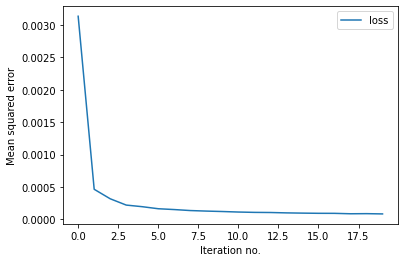

time: 254 ms (started: 2022-12-07 09:39:38 +00:00)


In [80]:
loss_df.plot()
plt.xlabel("Iteration no.")
plt.ylabel("Mean squared error")
#loss_df.savefig('1 rmse.png')

In [81]:
model.evaluate(X_test,y_Test)

54/54 [==============================] - 0s 2ms/step - loss: 7.5983e-05


7.598254160257056e-05

time: 290 ms (started: 2022-12-07 09:39:38 +00:00)


In [82]:
model.evaluate(X_train,y_train)

214/214 [==============================] - 1s 4ms/step - loss: 6.7906e-05


6.790619227103889e-05

time: 831 ms (started: 2022-12-07 09:39:39 +00:00)


In [83]:
train_predictions= model.predict(X_train)

214/214 [==============================] - 1s 3ms/step
time: 1.38 s (started: 2022-12-07 09:39:39 +00:00)


In [84]:
test_predictions = model.predict(X_test)

54/54 [==============================] - 0s 2ms/step
time: 171 ms (started: 2022-12-07 09:39:41 +00:00)


In [85]:
test_predictions.shape

(1707, 1)

time: 5.14 ms (started: 2022-12-07 09:39:41 +00:00)


In [86]:
print(test_predictions)

[[-0.02451152]
 [ 0.10134751]
 [ 0.12101279]
 ...
 [ 0.01381583]
 [ 0.01493145]
 [-0.06405699]]
time: 1 ms (started: 2022-12-07 09:39:41 +00:00)


In [87]:
pred_df = pd.DataFrame(y_Test,columns=['Test True z'])

time: 1.73 ms (started: 2022-12-07 09:39:41 +00:00)


In [88]:
pred_df2 = pd.DataFrame(test_predictions,columns=['Test predicted z'])

time: 1.17 ms (started: 2022-12-07 09:39:41 +00:00)


In [89]:
pred_df = pd.concat([pred_df,pred_df2],axis=1)
pred_df

,Test True z,Test predicted z
0,-0.026371,-0.024512
1,0.102234,0.101348
2,0.121689,0.121013
3,-0.007470,-0.006319
4,-0.102224,-0.102753
...,...,...
1702,0.118405,0.117255
1703,0.049309,0.052572
1704,0.010873,0.013816
1705,0.006112,0.014931


time: 21.7 ms (started: 2022-12-07 09:39:41 +00:00)


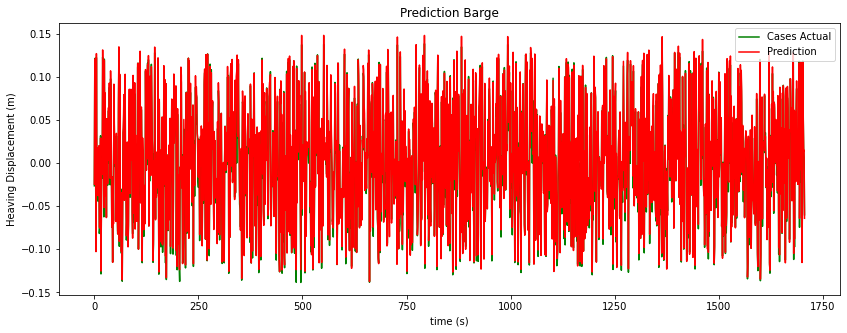

time: 494 ms (started: 2022-12-07 09:39:41 +00:00)


In [90]:
fig=plt.figure (figsize = (14,5))
plt.plot(y_Test, color = 'green', label = 'Cases Actual')
plt.plot(test_predictions,color = 'red', label = 'Prediction')
plt.title('Prediction Barge')
plt.xlabel('time (s)')
plt.ylabel('Heaving Displacement (m)')
plt.legend()
plt.show()
fig.savefig('1.png')

In [91]:
new_gem = [[154,40,8,9]]
new_gem = scaler.transform(new_gem)
new_gem

array([[1.37587605, 1.46813501, 1.67519028, 0.01803607]])

time: 6.33 ms (started: 2022-12-07 09:39:42 +00:00)


In [92]:
model.predict(new_gem)

1/1 [==============================] - 0s 28ms/step


array([[0.13874915]], dtype=float32)

time: 76.5 ms (started: 2022-12-07 09:39:42 +00:00)


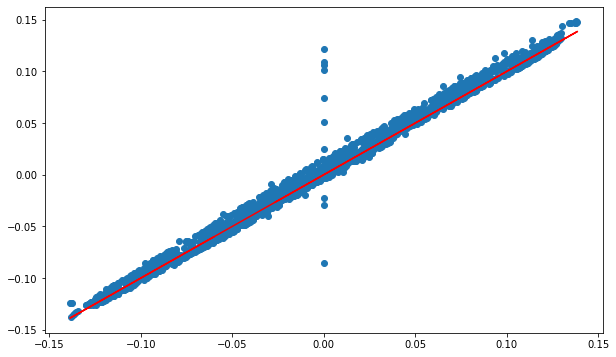

time: 229 ms (started: 2022-12-07 09:39:42 +00:00)


In [93]:
plt.figure(figsize=(10,6))
plt.scatter(y_Test,test_predictions)
plt.plot(y_Test,y_Test,'r')

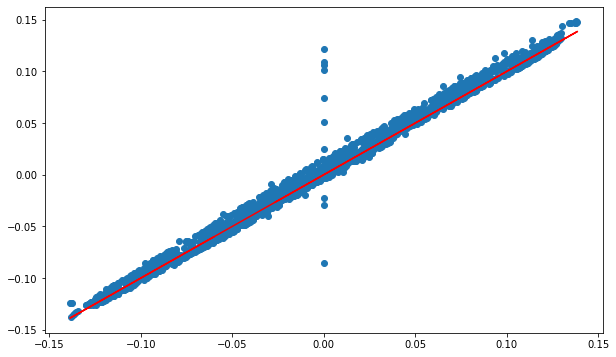

time: 202 ms (started: 2022-12-07 09:39:42 +00:00)


In [94]:
plt.figure(figsize=(10,6))
plt.scatter(y_Test,test_predictions)
plt.plot(y_Test,y_Test,'r')

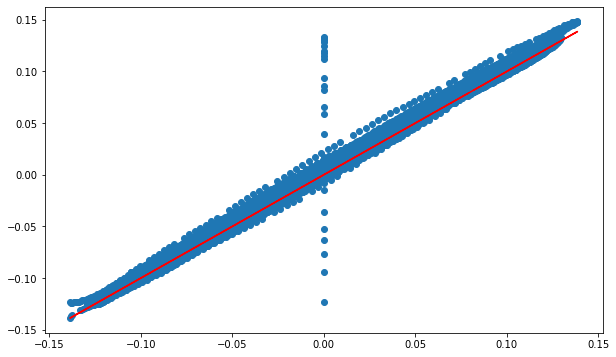

time: 224 ms (started: 2022-12-07 09:39:42 +00:00)


In [95]:
plt.figure(figsize=(10,6))
plt.scatter(y_train,train_predictions)
plt.plot(y_train,y_train,'r')

In [96]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_Test,test_predictions)

0.004994728494872347

time: 6.99 ms (started: 2022-12-07 09:39:42 +00:00)


In [97]:
np.sqrt(mean_squared_error(y_Test,test_predictions))*100

0.8716796852476313

time: 7.23 ms (started: 2022-12-07 09:39:42 +00:00)


In [98]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_Test,test_predictions)

0.9850862842602587

time: 9.06 ms (started: 2022-12-07 09:39:43 +00:00)


In [99]:
testdf=pd.read_excel('Forced_testdata_lbt_86.03.xlsx')
testdf

,L,B,T,t
0,86.03,20,3.98,0
1,86.03,20,3.98,1
2,86.03,20,3.98,3
3,86.03,20,3.98,5
4,86.03,20,3.98,7
...,...,...,...,...
246,86.03,20,3.98,491
247,86.03,20,3.98,493
248,86.03,20,3.98,495
249,86.03,20,3.98,497


time: 68.5 ms (started: 2022-12-07 09:39:43 +00:00)


In [100]:
testdfsca = scaler.transform(testdf)
testdfsca

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


array([[0.42795819, 0.34815419, 0.44556429, 0.        ],
       [0.42795819, 0.34815419, 0.44556429, 0.00200401],
       [0.42795819, 0.34815419, 0.44556429, 0.00601202],
       ...,
       [0.42795819, 0.34815419, 0.44556429, 0.99198397],
       [0.42795819, 0.34815419, 0.44556429, 0.99599198],
       [0.42795819, 0.34815419, 0.44556429, 1.        ]])

time: 18.4 ms (started: 2022-12-07 09:39:43 +00:00)


In [101]:
predicttestdf=model.predict(testdfsca)

8/8 [==============================] - 0s 3ms/step
time: 152 ms (started: 2022-12-07 09:39:43 +00:00)


In [102]:
predicttestdf


array([[ 0.07061291],
       [ 0.07071088],
       [ 0.070906  ],
       [ 0.07109285],
       [ 0.07127104],
       [ 0.07143776],
       [ 0.07154767],
       [ 0.07165758],
       [ 0.07176389],
       [ 0.07185638],
       [ 0.07180358],
       [ 0.07151167],
       [ 0.07121974],
       [ 0.07093042],
       [ 0.07048783],
       [ 0.07003649],
       [ 0.06958631],
       [ 0.06913612],
       [ 0.06862538],
       [ 0.06778026],
       [ 0.06691396],
       [ 0.06584718],
       [ 0.06474774],
       [ 0.06364832],
       [ 0.06254888],
       [ 0.06144945],
       [ 0.06032104],
       [ 0.05914824],
       [ 0.05793969],
       [ 0.05673113],
       [ 0.05552311],
       [ 0.054301  ],
       [ 0.05300948],
       [ 0.05162817],
       [ 0.05023028],
       [ 0.04876295],
       [ 0.04707476],
       [ 0.04530745],
       [ 0.04354601],
       [ 0.04174885],
       [ 0.03985373],
       [ 0.03794984],
       [ 0.03601773],
       [ 0.03402657],
       [ 0.03200314],
       [ 0

time: 14 ms (started: 2022-12-07 09:39:43 +00:00)


In [105]:
zreal=pd.read_excel('forced_z86.03.xlsx')
zreal

,z
0,0.000000
1,0.066803
2,0.066762
3,0.066678
4,0.066553
...,...
246,0.066066
247,0.066293
248,0.066480
249,0.066624


time: 159 ms (started: 2022-12-07 09:47:13 +00:00)


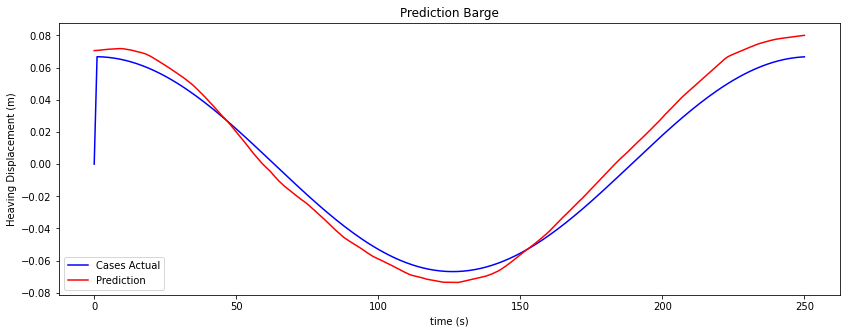

time: 305 ms (started: 2022-12-07 09:47:18 +00:00)


In [106]:
fig=plt.figure (figsize = (14,5))
plt.plot(zreal, color = 'blue', label = 'Cases Actual')
plt.plot(predicttestdf,color = 'red', label = 'Prediction')
plt.title('Prediction Barge')
plt.xlabel('time (s)')
plt.ylabel('Heaving Displacement (m)')
plt.legend()
plt.show()
fig.savefig('1.png')